## DISCIPLINA INTELIGÊNCIA ARTIFICIAL
### **APRENDIZAGEM NÃO SUPERVISIONADA: AGRUPAMENTO**

Exemplo: Algoritmo K-Means para agrupar clientes de um shopping. 

Os dados foram extraídos do site do Kaggle:

https://www.kaggle.com/shwetabh123/mall-customers

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('Mall_Customers.csv')

In [3]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


**ATRIBUTOS:** 

CustomerID: identificação do cliente.

Genre: Gênero.

Age: idade.

Annual Income (k$):	Rendimento anual.

Spending Score (1 a 100): Pontuação de gastos.

**IDADE**

In [4]:
import plotly.express as px

In [5]:
hist =  px.histogram (df,  x = "Annual Income (k$)", nbins=60) 
hist.update_layout(width=600,height=400,title_text='Distribuição da renda') 
hist.show()

**GÊNERO**

In [6]:
df['Genre'].value_counts()

Female    112
Male       88
Name: Genre, dtype: int64

In [7]:
df.shape

(200, 5)

## **EXPLORAÇÃO E TRATAMENTO DOS DADOS**

#### Alterando nome das colunas

In [8]:
df.rename(columns={'CustomerID': 'identificacao'}, inplace=True)

In [9]:
df.rename(columns={'Genre': 'genero'}, inplace=True)
df.rename(columns={'Age': 'idade'}, inplace=True)

In [10]:
df.rename(columns={'Annual Income (k$)': 'rendimento','Spending Score (1-100)':'pontuacao'}, inplace=True) 

**Valores Missing (NAN)**

In [11]:
# RELAÇÃO DA QUANTIDADE
df.isnull().sum()

identificacao    0
genero           0
idade            0
rendimento       0
pontuacao        0
dtype: int64

**Análise dos tipos de atributos.**

In [12]:
# object: strings
# int64: inteiros
# float64: reais
# complex: complexos
df.dtypes

identificacao     int64
genero           object
idade             int64
rendimento        int64
pontuacao         int64
dtype: object

**Dados Estatísticos**

In [13]:
df.describe()

,identificacao,idade,rendimento,pontuacao
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


### **PRÉ-PROCESSAMENTO**

In [14]:
df.head(2)

,identificacao,genero,idade,rendimento,pontuacao
0,1,Male,19,15,39
1,2,Male,21,15,81


###**Excluir identificação do cliente**

In [15]:
df2 = df.drop(labels = 'identificacao', axis = 1)

In [16]:
df2.head(2)

,genero,idade,rendimento,pontuacao
0,Male,19,15,39
1,Male,21,15,81


###**Transformar variáveis categóricas em numéricas**

In [17]:
from sklearn.preprocessing import LabelEncoder

In [18]:
le = LabelEncoder()
df2['genero'] = le.fit_transform(df2['genero'])

In [19]:
df2.head(3)

,genero,idade,rendimento,pontuacao
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6


## **K-MEANS COM DOIS ATRIBUTOS**

https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html 

In [20]:
df2

,genero,idade,rendimento,pontuacao
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40
...,...,...,...,...
195,0,35,120,79
196,0,45,126,28
197,1,32,126,74
198,1,32,137,18


###**Escalonamento**

In [21]:
from sklearn.preprocessing import StandardScaler

In [ ]:
# escala = StandardScaler()
# #dados = escala.fit_transform(df2.iloc[:, [2,3]].values)
# dados = escala.fit_transform(df2.values)

In [22]:
## Sem normalização
dados = df2.values

**Erro Mínimos Quadrados**

In [24]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 5, max_iter = 300)
    kmeans.fit(dados)
    # inertia: Método para gerar o wcss
    wcss.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
wcss

[308862.06000000006,
 212889.44245524303,
 143391.59236035676,
 104414.67534220168,
 75427.71182424155,
 58348.641363315044,
 51167.19736842104,
 44357.6215098352,
 40644.482749141665,
 37441.719097019915]

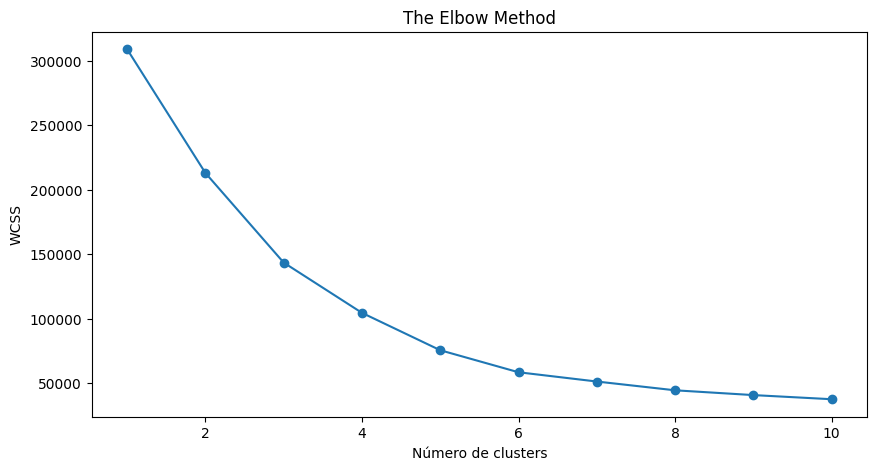

In [26]:
plt.figure(figsize=(10,5))
plt.plot(range(1,11),wcss, marker='o')
#sns.lineplot(wcss,marker='o',color='red')
plt.title('The Elbow Method')
plt.xlabel('Número de clusters')
plt.ylabel('WCSS')
plt.show()


**Agrupamento**

In [27]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 5, max_iter = 300)


In [28]:
kmeans1 = kmeans.fit(dados)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [29]:
# Coordenadas dos Centróides
centroides = kmeans1.cluster_centers_
centroides

array([[ 0.5       , 24.82142857, 28.71428571, 74.25      ],
       [ 0.52631579, 40.39473684, 87.        , 18.63157895],
       [ 0.46153846, 32.69230769, 86.53846154, 82.12820513],
       [ 0.37894737, 44.89473684, 48.70526316, 42.63157895]])

In [30]:
# Classificação dos dados
classificacao = kmeans1.labels_
classificacao

array([0, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 0,
       3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2], dtype=int32)

In [31]:
import plotly.express as px
import plotly.graph_objects as go

In [32]:
#Pontuação x Rendimento anual
graf1 = px.scatter(x = dados[:,2], y = dados[:,3], color=classificacao)
graf2 = px.scatter(x = centroides[:,2], y = centroides[:,3], size = [15, 15, 15, 15])
graf3 = go.Figure(data = graf1.data + graf2.data)
graf3.update_layout(width=800,height=500,title_text='Agrupamento K-Means')
graf3.update_xaxes(title = 'Rendimento anual (K$)')
graf3.update_yaxes(title = 'Pontuação')
graf3.show()

In [33]:
agrupamento = pd.DataFrame(classificacao, columns = ['Grupo'])
agrupamento

,Grupo
0,0
1,0
2,3
3,0
4,3
...,...
195,2
196,1
197,2
198,1


In [34]:
df3 = pd.concat([df, agrupamento],axis=1)
df3

,identificacao,genero,idade,rendimento,pontuacao,Grupo
0,1,Male,19,15,39,0
1,2,Male,21,15,81,0
2,3,Female,20,16,6,3
3,4,Female,23,16,77,0
4,5,Female,31,17,40,3
...,...,...,...,...,...,...
195,196,Female,35,120,79,2
196,197,Female,45,126,28,1
197,198,Male,32,126,74,2
198,199,Male,32,137,18,1


In [35]:
df3.columns

Index(['identificacao', 'genero', 'idade', 'rendimento', 'pontuacao', 'Grupo'], dtype='object')

In [36]:
df3['Grupo'].value_counts()

3    95
2    39
1    38
0    28
Name: Grupo, dtype: int64

In [37]:
df3.shape

(200, 6)

## Atividade K-Means
* Encontrar k grupos para a base Iris
* https://www.kaggle.com/datasets/uciml/iris